In [4]:

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import plot_model
from keras.layers.merge import add, concatenate
import cv2
from keras.models import load_model

Using TensorFlow backend.


In [5]:
def pre_process(path):  
    label=[]
    data=[]
    with open(path, 'r') as csvFile:
        reader = csv.reader(csvFile)# đọc file csv
        next(reader)
        for row in reader:# duyệt mỗi dòng
            label.append(row[0])# lấy label tại cột thứ nhất của mỗi dòng
            img=np.array(row[1:],dtype='float')/255.0# đọc dự liệu các cột còn lại của mỗi dòng
            img.resize(28,28) # resize lại kích thước 28x28       
            data.append(img)
        data=np.array(data)
        label=np.array(label,dtype='int')
    return data, label   

In [6]:
data_train, label_train=pre_process('fashion-mnist_train.csv')# đọc file train
x_test, label_test=pre_process('fashion-mnist_test.csv')# đọc file test

label: 9


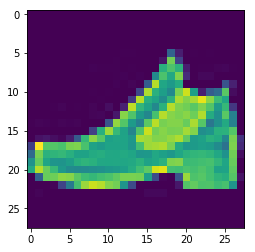

In [7]:
print('label:',label_train[1])
plt.imshow(data_train[1])
plt.show()

In [8]:
x_train, x_val, y_train, y_val = train_test_split(data_train, label_train, test_size=0.2, random_state=42)

y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(label_test, 10)

#label_train=keras.utils.to_categorical(label_train, 10)

In [9]:
print('num train data: ', len(x_train))
print('num val data: ', len(x_val))
print('num test data: ', len(x_test))
print('shape: ',x_train[1].shape)

num train data:  48000
num val data:  12000
num test data:  10000
shape:  (28, 28)


In [10]:
classes=10
w=28
h=28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, w, h)
    x_val = x_val.reshape(x_val.shape[0], 1, w, h)
    x_test = x_test.reshape(x_test.shape[0], w, h, 1)
    #data_train = data_train.reshape(data_train.shape[0], w, h, 1)
    input_shape = (1, w, h)
else:
    x_train = x_train.reshape(x_train.shape[0], w, h, 1)
    x_val = x_val.reshape(x_val.shape[0], w, h, 1)
    x_test = x_test.reshape(x_test.shape[0], w, h, 1)
    #data_train = data_train.reshape(data_train.shape[0], w, h, 1)
    input_shape = (w, h, 1)

In [11]:

## model 4
input_data=Input(name='the_input',shape=input_shape,dtype='float32')

inner=Conv2D(32,kernel_size=(3,3),activation='relu',name='conv1')(input_data)

inner=Conv2D(64,kernel_size=(3,3),activation='relu',name='conv2')(inner)

inner=MaxPooling2D(pool_size=(3,3), name='max1')(inner)

inner=Dropout(0.25,name='drop1')(inner)

inner1=Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',name='conv3')(inner)

inner2=Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',name='conv4')(inner)

inner=concatenate([inner1,inner2])

inner=Dropout(0.5,name='drop2')(inner)

inner=Flatten(name='flat1')(inner)

inner=Dense(128,activation='relu',name='dense1')(inner)

inner=Dropout(0.5,name='drop3')(inner)

inner=Dense(64,activation='relu',name='dense2')(inner)

inner=Dropout(0.5,name='drop4')(inner)

output=Dense(10,activation='softmax')(inner)

model=Model(inputs=input_data, outputs=output)

model.summary()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 26, 26, 32)   320         the_input[0][0]                  
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 24, 24, 64)   18496       conv1[0][0]                      
__________________________________________________________________________________________________
max1 (MaxPooling2D)  

In [13]:
#plot_model(model, to_file='model.png', show_shapes=True)

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=64,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 12s 243us/step - loss: 0.1489 - acc: 0.9485 - val_loss: 0.2247 - val_acc: 0.9316
Epoch 2/64
48000/48000 [==============================] - 12s 240us/step - loss: 0.1469 - acc: 0.9489 - val_loss: 0.2126 - val_acc: 0.9346
Epoch 3/64
48000/48000 [==============================] - 11s 239us/step - loss: 0.1382 - acc: 0.9504 - val_loss: 0.2248 - val_acc: 0.9309
Epoch 4/64
48000/48000 [==============================] - 12s 241us/step - loss: 0.1357 - acc: 0.9520 - val_loss: 0.2154 - val_acc: 0.9344
Epoch 5/64
48000/48000 [==============================] - 12s 240us/step - loss: 0.1380 - acc: 0.9517 - val_loss: 0.2084 - val_acc: 0.9328
Epoch 6/64
48000/48000 [==============================] - 12s 242us/step - loss: 0.1337 - acc: 0.9523 - val_loss: 0.2180 - val_acc: 0.9351
Epoch 7/64
48000/48000 [==============================] - 12s 242us/step - loss: 0.1361 - acc: 0.9515 - val_loss: 0.

In [35]:
print('model 4')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model 4
Test loss: 0.22439276351677254
Test accuracy: 0.9426


In [0]:
model.save('model.h5')

In [15]:
x=load_model('model.h5')

Instructions for updating:
Use tf.cast instead.


In [16]:
print('model 4')
score = x.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model 4
Test loss: 0.22439273035489024
Test accuracy: 0.9426
